## Лабораторна робота 3

Зчитати файл doc11. Вважати кожен рядок окремим документом корпусу. Виконати попередню обробку корпусу.

1) Представити корпус як модель «Сумка слів». Вивести вектор для слова MARINER.
2) Представити корпус як модель TF-IDF. Спробувати кластеризувати документи за допомогою ієрархічної агломераційної кластеризації.
3) Представити корпус як модель Word2Vec. Знайти подібні слова до слів mobile, Athens.

Зчитування файлу

In [2]:
with open('doc11.txt') as f:
    text = f.read()

In [3]:
text

'MARINER 6 and 7 were sent to Mars in 1969 and expanded upon the work done by MARINER 4 four years earlier.\nBack under the spotlight of public scrutiny she will attempt to erase the double disappointment of the Athens Olympics.\nMARINER 8 ended up in the Atlantic Ocean in 1971 when the rocket launcher autopilot failed.\nMore than 50 million people own a mobile in the UK, but mobile operators are keen to encourage people to move onto more sophisticated handsets that can do more.\nMARINER 4, the sister probe to MARINER 3, did reach Mars in 1965.\nA further recent survey said that only 4% of mobile owners were thinking of upgrading to 3G phones.\nRadcliffe concedes she will probably learn a lot from her bad experiences in Athens in time.'

Попередня обробка корпусу

In [4]:
import re


def preprocess_text(document):
    """Функція для очищення тексту."""
    text = document.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Розділення тексту на окремі документи (рядки)
documents = text.split('\n')

# Попередня обробка кожного документу
documents = [preprocess_text(doc) for doc in documents]

In [5]:
# Виведення кількості документів
print(f"Document count: {len(documents)}\n")

# Виведення документів
for i, doc in enumerate(documents, start=1):
    print(f"Document {i}: {doc}\n")

Document count: 7

Document 1: mariner 6 and 7 were sent to mars in 1969 and expanded upon the work done by mariner 4 four years earlier

Document 2: back under the spotlight of public scrutiny she will attempt to erase the double disappointment of the athens olympics

Document 3: mariner 8 ended up in the atlantic ocean in 1971 when the rocket launcher autopilot failed

Document 4: more than 50 million people own a mobile in the uk but mobile operators are keen to encourage people to move onto more sophisticated handsets that can do more

Document 5: mariner 4 the sister probe to mariner 3 did reach mars in 1965

Document 6: a further recent survey said that only 4 of mobile owners were thinking of upgrading to 3g phones

Document 7: radcliffe concedes she will probably learn a lot from her bad experiences in athens in time


1) Представити корпус як модель «Сумка слів». Вивести вектор для слова MARINER.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Створення моделі "Сумки слів"
vectorizer = CountVectorizer()

# Побудова матриці ознак
matrix = vectorizer.fit_transform(documents)
print(matrix)

  (0, 39)	2
  (0, 5)	2
  (0, 81)	1
  (0, 64)	1
  (0, 75)	1
  (0, 40)	1
  (0, 34)	1
  (0, 1)	1
  (0, 26)	1
  (0, 80)	1
  (0, 72)	1
  (0, 84)	1
  (0, 20)	1
  (0, 14)	1
  (0, 29)	1
  (0, 85)	1
  (0, 22)	1
  (1, 75)	1
  (1, 72)	3
  (1, 11)	1
  (1, 77)	1
  (1, 68)	1
  (1, 46)	2
  (1, 57)	1
  (1, 63)	1
  :	:
  (5, 71)	1
  (5, 31)	1
  (5, 60)	1
  (5, 69)	1
  (5, 62)	1
  (5, 48)	1
  (5, 52)	1
  (5, 73)	1
  (5, 79)	1
  (5, 3)	1
  (5, 54)	1
  (6, 34)	2
  (6, 65)	1
  (6, 83)	1
  (6, 7)	1
  (6, 58)	1
  (6, 16)	1
  (6, 55)	1
  (6, 37)	1
  (6, 38)	1
  (6, 30)	1
  (6, 33)	1
  (6, 12)	1
  (6, 27)	1
  (6, 74)	1


In [7]:
# Отримання індексу слова MARINER
mariner_index = vectorizer.vocabulary_.get('mariner')
mariner_index

39

In [8]:
# Отримання вектору
mariner_vector = matrix[:, mariner_index].toarray()

# Виведення вектору для слова MARINER
print(f"Bag of Words vector for the word 'MARINER':\n{mariner_vector}\n")

Bag of Words vector for the word 'MARINER':
[[2]
 [0]
 [1]
 [0]
 [2]
 [0]
 [0]]


2) Представити корпус як модель TF-IDF. Спробувати кластеризувати документи за допомогою ієрархічної агломераційної кластеризації.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Створення моделі TF-IDF (term frequency * inverse document frequency) 
tfidf_vectorizer = TfidfVectorizer()

# Побудова матриці TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Виведення розміру матриці
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (7, 86)


In [10]:
# Виведення матриці
print(tfidf_matrix)

  (0, 22)	0.23398377688825858
  (0, 85)	0.23398377688825858
  (0, 29)	0.23398377688825858
  (0, 14)	0.23398377688825858
  (0, 20)	0.23398377688825858
  (0, 84)	0.23398377688825858
  (0, 72)	0.1262613362595254
  (0, 80)	0.23398377688825858
  (0, 26)	0.23398377688825858
  (0, 1)	0.23398377688825858
  (0, 34)	0.1262613362595254
  (0, 40)	0.19422662917952796
  (0, 75)	0.1262613362595254
  (0, 64)	0.23398377688825858
  (0, 81)	0.19422662917952796
  (0, 5)	0.46796755377651716
  (0, 39)	0.33203696793651205
  (1, 47)	0.2374556839725304
  (1, 7)	0.19710861022441328
  (1, 18)	0.2374556839725304
  (1, 21)	0.2374556839725304
  (1, 25)	0.2374556839725304
  (1, 9)	0.2374556839725304
  (1, 83)	0.19710861022441328
  (1, 65)	0.19710861022441328
  :	:
  (5, 52)	0.257219180133628
  (5, 48)	0.257219180133628
  (5, 62)	0.257219180133628
  (5, 69)	0.257219180133628
  (5, 60)	0.257219180133628
  (5, 31)	0.257219180133628
  (5, 71)	0.2135140093132813
  (5, 42)	0.2135140093132813
  (5, 46)	0.4270280186265626
 

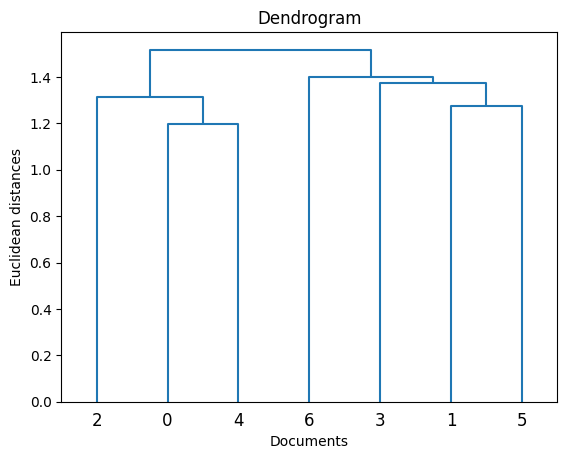

In [11]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


# Візуалізація дерева кластеризації
dendrogram = sch.dendrogram(sch.linkage(tfidf_matrix.toarray(), method='ward'))
plt.title('Dendrogram')
plt.xlabel('Documents')
plt.ylabel('Euclidean distances')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering


# Застосування ієрархічної агломеративної кластеризації
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = agg_cluster.fit_predict(tfidf_matrix.toarray())

# Виведення міток кластерів
print("Cluster labels:", cluster_labels)

Cluster labels: [1 0 1 0 1 0 2]


3) Представити корпус як модель Word2Vec. Знайти подібні слова до слів mobile, Athens.

In [13]:
from gensim.utils import simple_preprocess

# Розділення тексту на слова
tokenized_corpus = [simple_preprocess(doc) for doc in documents]
tokenized_corpus

[['mariner',
  'and',
  'were',
  'sent',
  'to',
  'mars',
  'in',
  'and',
  'expanded',
  'upon',
  'the',
  'work',
  'done',
  'by',
  'mariner',
  'four',
  'years',
  'earlier'],
 ['back',
  'under',
  'the',
  'spotlight',
  'of',
  'public',
  'scrutiny',
  'she',
  'will',
  'attempt',
  'to',
  'erase',
  'the',
  'double',
  'disappointment',
  'of',
  'the',
  'athens',
  'olympics'],
 ['mariner',
  'ended',
  'up',
  'in',
  'the',
  'atlantic',
  'ocean',
  'in',
  'when',
  'the',
  'rocket',
  'launcher',
  'autopilot',
  'failed'],
 ['more',
  'than',
  'million',
  'people',
  'own',
  'mobile',
  'in',
  'the',
  'uk',
  'but',
  'mobile',
  'operators',
  'are',
  'keen',
  'to',
  'encourage',
  'people',
  'to',
  'move',
  'onto',
  'more',
  'sophisticated',
  'handsets',
  'that',
  'can',
  'do',
  'more'],
 ['mariner',
  'the',
  'sister',
  'probe',
  'to',
  'mariner',
  'did',
  'reach',
  'mars',
  'in'],
 ['further',
  'recent',
  'survey',
  'said',
  

In [14]:
from gensim.models import Word2Vec


# Побудова моделі Word2Vec
word2vec_model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, sg=0)

# Знаходження подібних слів до слова "mobile"
similar_mobile = word2vec_model.wv.most_similar("mobile", topn=5)
print("Words similar to 'mobile':", similar_mobile)

Words similar to 'mobile': [('move', 0.30914372205734253), ('but', 0.2806518077850342), ('do', 0.2358178049325943), ('further', 0.19169440865516663), ('uk', 0.1807056963443756)]


In [15]:
# Знайдення подібних слів до слова "Athens"
similar_athens = word2vec_model.wv.most_similar("athens", topn=5)
print("Words similar to 'Athens':", similar_athens)

Words similar to 'Athens': [('but', 0.3151249587535858), ('upgrading', 0.31394505500793457), ('erase', 0.18276050686836243), ('encourage', 0.18255026638507843), ('to', 0.1740032136440277)]
